In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cluster_mpg.csv')

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [5]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

<Figure size 1080x576 with 0 Axes>

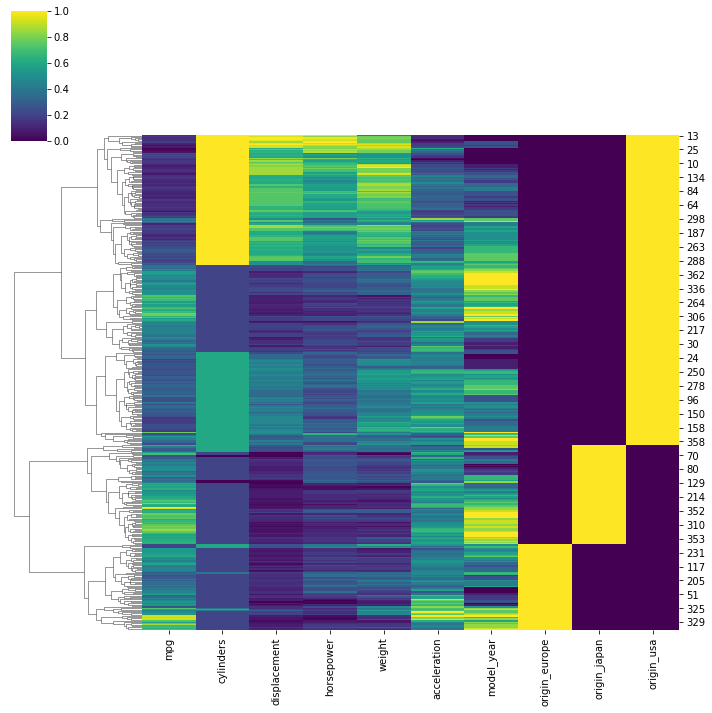

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,col_cluster=False,cmap='viridis')

<AxesSubplot:xlabel='mpg', ylabel='weight'>

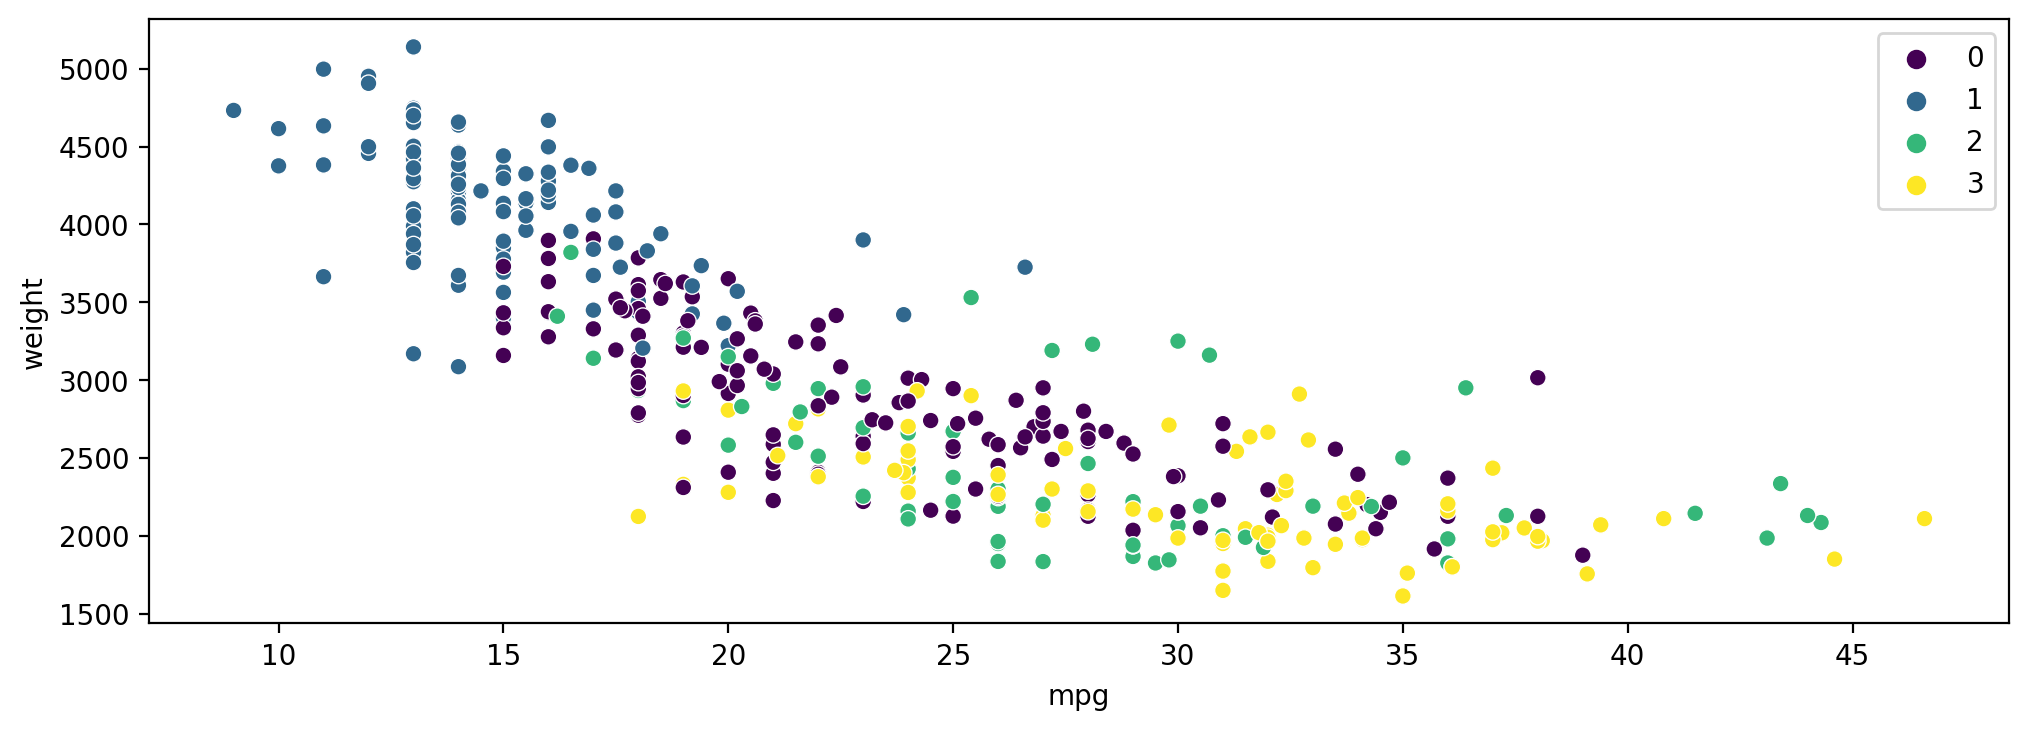

In [16]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(scaled_df)

plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels,palette='viridis')

In [31]:
scaled_df['mpg'].idxmax()

320

In [32]:
scaled_df['mpg'].idxmin()

28

In [33]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]
distance = np.linalg.norm(car_a-car_b)
distance

2.3852929970374714

In [34]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)
cluster_labels = model.fit_predict(scaked_df)
linkage_matrix = hierarchy.linkage(model.children_)

In [35]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

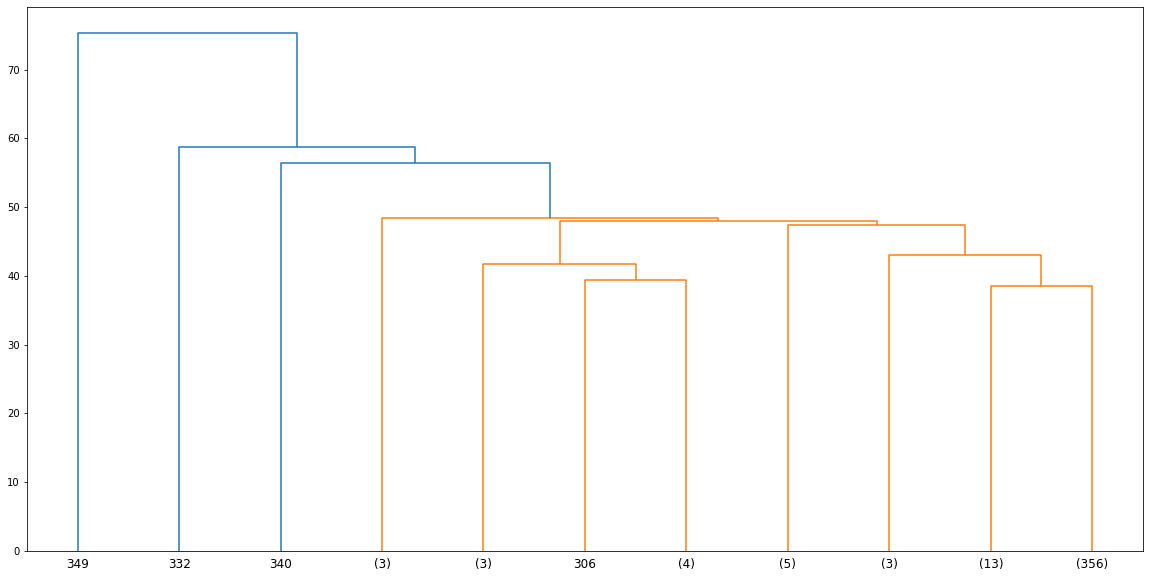

In [36]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=11)